#                    **Consumer Complaint Resolution Analysis** 

In [1]:
# Standard imports 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
%matplotlib inline

# Exploratory Data Analysis (EDA)

In [2]:
# Loading train dataset with top 5 record  
train_data = pd.read_csv("/content/Consumer_Complaints_train.csv")
train_data.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2015-10-14,Credit reporting,NaN,Incorrect information on credit report,Information is not mine,NaN,NaN,Equifax,GA,30134,NaN,Consent not provided,Web,2015-10-14,Closed with explanation,Yes,No,1605653
1,2015-04-26,Bank account or service,Other bank product/service,Deposits and withdrawals,NaN,RE : XXXX XXXX XXXX-PRIVILEGED AND CONFIDENTIA...,NaN,Wells Fargo & Company,GA,319XX,NaN,Consent provided,Web,2015-04-26,Closed with explanation,Yes,Yes,1347613
2,2013-12-20,Credit card,NaN,Other,NaN,NaN,NaN,Citibank,SC,29203,NaN,NaN,Phone,2014-01-03,Closed with non-monetary relief,Yes,No,640394
3,2016-03-03,Debt collection,"Other (i.e. phone, health club, etc.)",Disclosure verification of debt,Not given enough info to verify debt,NaN,Company has responded to the consumer and the ...,"FAIR COLLECTIONS & OUTSOURCING, INC.",OH,43082,NaN,NaN,Referral,2016-03-04,Closed with explanation,Yes,No,1815134
4,2015-01-30,Debt collection,Medical,Disclosure verification of debt,Not given enough info to verify debt,NaN,NaN,"HCFS Health Care Financial Services, Inc.",CA,90036,NaN,NaN,Web,2015-01-30,Closed with explanation,Yes,Yes,1218613


In [3]:
# Loading test dataset with top 5 record
test_data = pd.read_csv("/content/Consumer_Complaints_test.csv")
test_data.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Complaint ID
0,2015-01-17,Credit card,NaN,Customer service / Customer relations,NaN,NaN,NaN,Citibank,TX,75241,NaN,NaN,Web,2015-01-17,Closed with monetary relief,Yes,1198133
1,2016-06-22,Consumer Loan,Title loan,Payment to acct not credited,NaN,NaN,Company believes it acted appropriately as aut...,"Larsen MacColl Partners II, L.P.",TX,76548,Servicemember,NaN,Phone,2016-06-22,Closed with explanation,Yes,1979989
2,2015-09-04,Credit card,NaN,Credit line increase/decrease,NaN,I WANT TO REQUEST A CREDIT LINE INCREASE OF XX...,NaN,Capital One,NC,271XX,NaN,Consent provided,Web,2015-09-04,Closed with explanation,Yes,1552090
3,2016-05-17,Consumer Loan,Installment loan,Problems when you are unable to pay,NaN,I have asked One Main Financial not to call my...,NaN,"OneMain Financial Holdings, LLC",MO,634XX,NaN,Consent provided,Web,2016-05-20,Closed with non-monetary relief,Yes,1929306
4,2016-07-07,Debt collection,"Other (i.e. phone, health club, etc.)",Improper contact or sharing of info,Contacted employer after asked not to,I have received several calls from a XXXX XXXX...,Company has responded to the consumer and the ...,"GMA Investments, LLC",SC,296XX,NaN,Consent provided,Web,2016-07-07,Closed with explanation,Yes,2001667


In [4]:
# Checking the shape of the train and test dataset
print('Train Data Shape :',train_data.shape)
print('Test Data Shape :',test_data.shape)

Train Data Shape : (358810, 18)
Test Data Shape : (119606, 17)


In [5]:
# Columns of train dataset
train_data.columns

Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?', 'Complaint ID'],
      dtype='object')

In [6]:
# Columns of test dataset
test_data.columns

Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Complaint ID'],
      dtype='object')

In [7]:
# Checking the data types of train dataset
train_data.dtypes

Date received                   object
Product                         object
Sub-product                     object
Issue                           object
Sub-issue                       object
Consumer complaint narrative    object
Company public response         object
Company                         object
State                           object
ZIP code                        object
Tags                            object
Consumer consent provided?      object
Submitted via                   object
Date sent to company            object
Company response to consumer    object
Timely response?                object
Consumer disputed?              object
Complaint ID                     int64
dtype: object

In [8]:
# Checking the data types of test dataSet
test_data.dtypes

Date received                   object
Product                         object
Sub-product                     object
Issue                           object
Sub-issue                       object
Consumer complaint narrative    object
Company public response         object
Company                         object
State                           object
ZIP code                        object
Tags                            object
Consumer consent provided?      object
Submitted via                   object
Date sent to company            object
Company response to consumer    object
Timely response?                object
Complaint ID                     int64
dtype: object

In [9]:
# Train dataset info()
train_data.info()            

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 358810 entries, 0 to 358809
Data columns (total 18 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   Date received                 358810 non-null  object
 1   Product                       358810 non-null  object
 2   Sub-product                   255024 non-null  object
 3   Issue                         358810 non-null  object
 4   Sub-issue                     139436 non-null  object
 5   Consumer complaint narrative  56180 non-null   object
 6   Company public response       67931 non-null   object
 7   Company                       358810 non-null  object
 8   State                         355907 non-null  object
 9   ZIP code                      355899 non-null  object
 10  Tags                          50226 non-null   object
 11  Consumer consent provided?    101580 non-null  object
 12  Submitted via                 358810 non-null  object
 13 

In [10]:
# Checking the null values in train dataset
print(train_data.isnull().sum())

Date received                        0
Product                              0
Sub-product                     103786
Issue                                0
Sub-issue                       219374
Consumer complaint narrative    302630
Company public response         290879
Company                              0
State                             2903
ZIP code                          2911
Tags                            308584
Consumer consent provided?      257230
Submitted via                        0
Date sent to company                 0
Company response to consumer         0
Timely response?                     0
Consumer disputed?                   0
Complaint ID                         0
dtype: int64


In [11]:
# Printing  missing values in percentage for train dataset to have more understanding
percent_missing_train = train_data.isnull().sum() * 100 / len(train_data)
missing_value_train_df = pd.DataFrame({'Column_name': train_data.columns,
                                 'Percent_missing': percent_missing_train})
missing_value_train_df.sort_values('Percent_missing',ascending=False).drop('Column_name',axis=1)

,Percent_missing
Tags,86.002062
Consumer complaint narrative,84.342688
Company public response,81.067696
Consumer consent provided?,71.689752
Sub-issue,61.139322
Sub-product,28.925058
ZIP code,0.811293
State,0.809063
Date sent to company,0.000000
Consumer disputed?,0.000000


In [12]:
# Printing  missing values in percentage for test dataset for more understanding
percent_missing_test = test_data.isnull().sum() * 100 / len(test_data)
missing_value_test_df = pd.DataFrame({'Column_name': test_data.columns,
                                 'Percent_missing': percent_missing_test})
missing_value_test_df.sort_values('Percent_missing',ascending=False).drop('Column_name',axis=1)

,Percent_missing
Tags,85.805896
Consumer complaint narrative,84.186412
Company public response,81.221678
Consumer consent provided?,71.651088
Sub-issue,61.242747
Sub-product,28.997709
ZIP code,0.783406
State,0.782569
Submitted via,0.000000
Timely response?,0.000000


It is very important to deal with nan values properly as it can introduce bais and effect the result while removing or replacing the nan values

In [13]:
# Droping the columns where more than 25% of data are missing in train dataset
train_data = train_data.drop(['Tags','Consumer complaint narrative','Company public response',
                             'Consumer consent provided?','Sub-issue','Sub-product'],axis=1)
train_data.head()

,Date received,Product,Issue,Company,State,ZIP code,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2015-10-14,Credit reporting,Incorrect information on credit report,Equifax,GA,30134,Web,2015-10-14,Closed with explanation,Yes,No,1605653
1,2015-04-26,Bank account or service,Deposits and withdrawals,Wells Fargo & Company,GA,319XX,Web,2015-04-26,Closed with explanation,Yes,Yes,1347613
2,2013-12-20,Credit card,Other,Citibank,SC,29203,Phone,2014-01-03,Closed with non-monetary relief,Yes,No,640394
3,2016-03-03,Debt collection,Disclosure verification of debt,"FAIR COLLECTIONS & OUTSOURCING, INC.",OH,43082,Referral,2016-03-04,Closed with explanation,Yes,No,1815134
4,2015-01-30,Debt collection,Disclosure verification of debt,"HCFS Health Care Financial Services, Inc.",CA,90036,Web,2015-01-30,Closed with explanation,Yes,Yes,1218613


In [14]:
train_data.shape

(358810, 12)

In [15]:
# Droping the columns where more than 25% of data are missing in test dataset
test_data = test_data.drop(['Tags','Consumer complaint narrative','Company public response',
                             'Consumer consent provided?','Sub-issue','Sub-product'],axis=1)
test_data.head()

,Date received,Product,Issue,Company,State,ZIP code,Submitted via,Date sent to company,Company response to consumer,Timely response?,Complaint ID
0,2015-01-17,Credit card,Customer service / Customer relations,Citibank,TX,75241,Web,2015-01-17,Closed with monetary relief,Yes,1198133
1,2016-06-22,Consumer Loan,Payment to acct not credited,"Larsen MacColl Partners II, L.P.",TX,76548,Phone,2016-06-22,Closed with explanation,Yes,1979989
2,2015-09-04,Credit card,Credit line increase/decrease,Capital One,NC,271XX,Web,2015-09-04,Closed with explanation,Yes,1552090
3,2016-05-17,Consumer Loan,Problems when you are unable to pay,"OneMain Financial Holdings, LLC",MO,634XX,Web,2016-05-20,Closed with non-monetary relief,Yes,1929306
4,2016-07-07,Debt collection,Improper contact or sharing of info,"GMA Investments, LLC",SC,296XX,Web,2016-07-07,Closed with explanation,Yes,2001667


In [16]:
test_data.shape

(119606, 11)

In [17]:
#Extracting Day, Month,and Year from Date Received Column and create 
#new fields for a month, year,and day on train dataset
train_data['Year Received'] = pd.DatetimeIndex(train_data['Date received']).year
train_data['Month Received'] = pd.DatetimeIndex(train_data['Date received']).month
train_data['Day Received'] = pd.DatetimeIndex(train_data['Date received']).day
train_data.head(2)

,Date received,Product,Issue,Company,State,ZIP code,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID,Year Received,Month Received,Day Received
0,2015-10-14,Credit reporting,Incorrect information on credit report,Equifax,GA,30134,Web,2015-10-14,Closed with explanation,Yes,No,1605653,2015,10,14
1,2015-04-26,Bank account or service,Deposits and withdrawals,Wells Fargo & Company,GA,319XX,Web,2015-04-26,Closed with explanation,Yes,Yes,1347613,2015,4,26


In [18]:
#Extracting Day, Month,and Year from Date Received Column and create 
#new fields for a month, year,and day on test dataset
test_data['Year Received'] = pd.DatetimeIndex(test_data['Date received']).year
test_data['Month Received'] = pd.DatetimeIndex(test_data['Date received']).month
test_data['Day Received'] = pd.DatetimeIndex(test_data['Date received']).day
test_data.head(2)

,Date received,Product,Issue,Company,State,ZIP code,Submitted via,Date sent to company,Company response to consumer,Timely response?,Complaint ID,Year Received,Month Received,Day Received
0,2015-01-17,Credit card,Customer service / Customer relations,Citibank,TX,75241,Web,2015-01-17,Closed with monetary relief,Yes,1198133,2015,1,17
1,2016-06-22,Consumer Loan,Payment to acct not credited,"Larsen MacColl Partners II, L.P.",TX,76548,Phone,2016-06-22,Closed with explanation,Yes,1979989,2016,6,22


In [19]:
# Converting dates from object type to datetime type of train dataset
train_data['Date received'] = pd.to_datetime(train_data['Date received'])
train_data['Date sent to company'] = pd.to_datetime(train_data['Date sent to company'])
print(train_data['Date received'].dtypes)
print(train_data['Date sent to company'].dtypes)

datetime64[ns]
datetime64[ns]


In [20]:
# Converting dates from object type to datetime type of test dataset
test_data['Date received'] = pd.to_datetime(test_data['Date received'])
test_data['Date sent to company'] = pd.to_datetime(test_data['Date sent to company'])
print(test_data['Date received'].dtypes)
print(test_data['Date sent to company'].dtypes)

datetime64[ns]
datetime64[ns]


In [21]:
# Calculateing the Number of Days the Complaint was with the Company and create a new field as 
# Days held for train dataset
train_data['Days held'] = (train_data['Date sent to company'] - train_data['Date received']).dt.days

In [22]:
train_data['Days held'].head()

0     0
1     0
2    14
3     1
4     0
Name: Days held, dtype: int64

In [23]:
train_data.head(2)

,Date received,Product,Issue,Company,State,ZIP code,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID,Year Received,Month Received,Day Received,Days held
0,2015-10-14,Credit reporting,Incorrect information on credit report,Equifax,GA,30134,Web,2015-10-14,Closed with explanation,Yes,No,1605653,2015,10,14,0
1,2015-04-26,Bank account or service,Deposits and withdrawals,Wells Fargo & Company,GA,319XX,Web,2015-04-26,Closed with explanation,Yes,Yes,1347613,2015,4,26,0


In [24]:
# Calculateing the Number of Days the Complaint was with the Company and create a new field as 
# Days held for test dataset
test_data['Days held'] = (test_data['Date sent to company'] - test_data['Date received']).dt.days
test_data['Days held'].head()

0    0
1    0
2    0
3    3
4    0
Name: Days held, dtype: int64

In [25]:
test_data.head(2)

,Date received,Product,Issue,Company,State,ZIP code,Submitted via,Date sent to company,Company response to consumer,Timely response?,Complaint ID,Year Received,Month Received,Day Received,Days held
0,2015-01-17,Credit card,Customer service / Customer relations,Citibank,TX,75241,Web,2015-01-17,Closed with monetary relief,Yes,1198133,2015,1,17,0
1,2016-06-22,Consumer Loan,Payment to acct not credited,"Larsen MacColl Partners II, L.P.",TX,76548,Phone,2016-06-22,Closed with explanation,Yes,1979989,2016,6,22,0


In [26]:
train_data['Days held'].dtypes , test_data['Days held'].dtypes      # checking the datatype

(dtype('int64'), dtype('int64'))

In [27]:
# Droping "Date Received","Date Sent to Company","ZIP Code","Complaint ID" from train dataset to remove the unnecessary noise 
train_data = train_data.drop(['Date received','Date sent to company','ZIP code','Complaint ID'],
                            axis=1)
train_data.head(2)

,Product,Issue,Company,State,Submitted via,Company response to consumer,Timely response?,Consumer disputed?,Year Received,Month Received,Day Received,Days held
0,Credit reporting,Incorrect information on credit report,Equifax,GA,Web,Closed with explanation,Yes,No,2015,10,14,0
1,Bank account or service,Deposits and withdrawals,Wells Fargo & Company,GA,Web,Closed with explanation,Yes,Yes,2015,4,26,0


In [28]:
# Droping "Date Received","Date Sent to Company","ZIP Code","Complaint ID" from test dataset to remove unnecessary noise 
test_data = test_data.drop(['Date received','Date sent to company','ZIP code','Complaint ID'],
                            axis=1)
test_data.head(2)

,Product,Issue,Company,State,Submitted via,Company response to consumer,Timely response?,Year Received,Month Received,Day Received,Days held
0,Credit card,Customer service / Customer relations,Citibank,TX,Web,Closed with monetary relief,Yes,2015,1,17,0
1,Consumer Loan,Payment to acct not credited,"Larsen MacColl Partners II, L.P.",TX,Phone,Closed with explanation,Yes,2016,6,22,0


In [29]:
# checking the number of unique state
print(train_data['State'].unique())
train_data['State'].mode()

['GA' 'SC' 'OH' 'CA' 'FL' 'NJ' 'IL' 'PA' 'ID' 'UT' 'TX' 'TN' 'NM' 'VA'
 'MO' 'KY' 'MN' 'IN' 'MD' 'WI' 'NY' 'KS' 'CO' 'AZ' 'OK' 'MI' 'CT' 'LA'
 'OR' 'NC' 'MS' 'NH' 'AL' 'MA' 'WA' 'DC' 'AR' nan 'VI' 'DE' 'NV' 'IA' 'WV'
 'NE' 'VT' 'ME' 'ND' 'HI' 'RI' 'WY' 'SD' 'PR' 'FM' 'MT' 'AK' 'AE' 'GU'
 'AP' 'MH' 'AS' 'MP' 'PW' 'AA']


0    CA
dtype: object

In [30]:
# Imputing null value in “State” by mode in train dataset
train_data['State'] = train_data['State'].fillna(train_data['State'].mode()[0])
train_data['State'].isnull().sum()

0

In [31]:
# Checking the consumer dispute values in every state
train_data['State'].value_counts()

CA    55271
FL    34567
TX    26683
NY    24554
GA    15886
      ...  
MH       19
MP       13
AS        9
PW        8
AA        7
Name: State, Length: 62, dtype: int64

In [32]:
# Imputing Null value in “State” by Mode for test dataset
test_data['State'] = test_data['State'].fillna(test_data['State'].mode()[0])
test_data['State'].isnull().sum()

0

In [33]:
# Checking Missing Values in the train dataset
train_data.isnull().sum()

Product                         0
Issue                           0
Company                         0
State                           0
Submitted via                   0
Company response to consumer    0
Timely response?                0
Consumer disputed?              0
Year Received                   0
Month Received                  0
Day Received                    0
Days held                       0
dtype: int64

In [34]:
# Checking Missing Values in the test dataset
test_data.isnull().sum()

Product                         0
Issue                           0
Company                         0
State                           0
Submitted via                   0
Company response to consumer    0
Timely response?                0
Year Received                   0
Month Received                  0
Day Received                    0
Days held                       0
dtype: int64

In [35]:
# Categorizeing Days into Weeks with the help of 'Days Received' in train dataset
train_data['Day Received'] = pd.to_datetime(train_data['Day Received'], format='%d')

train_data['Week Received'] = train_data['Day Received'].sub(train_data['Day Received']
                                                             .min()).dt.days // 7 + 1
train_data.head(2)

,Product,Issue,Company,State,Submitted via,Company response to consumer,Timely response?,Consumer disputed?,Year Received,Month Received,Day Received,Days held,Week Received
0,Credit reporting,Incorrect information on credit report,Equifax,GA,Web,Closed with explanation,Yes,No,2015,10,1900-01-14,0,2
1,Bank account or service,Deposits and withdrawals,Wells Fargo & Company,GA,Web,Closed with explanation,Yes,Yes,2015,4,1900-01-26,0,4


In [36]:
# Categorizeing Days into Weeks with the help of 'Days Received' in test dataset
test_data['Day Received'] = pd.to_datetime(test_data['Day Received'], format='%d')

test_data['Week Received'] = test_data['Day Received'].sub(test_data['Day Received']
                                                             .min()).dt.days // 7 + 1
test_data.head(2)

,Product,Issue,Company,State,Submitted via,Company response to consumer,Timely response?,Year Received,Month Received,Day Received,Days held,Week Received
0,Credit card,Customer service / Customer relations,Citibank,TX,Web,Closed with monetary relief,Yes,2015,1,1900-01-17,0,3
1,Consumer Loan,Payment to acct not credited,"Larsen MacColl Partners II, L.P.",TX,Phone,Closed with explanation,Yes,2016,6,1900-01-22,0,4


In [37]:
# Droping "Day_Received" column in train dataset
train_data = train_data.drop('Day Received',axis=1)
train_data.head(2)

,Product,Issue,Company,State,Submitted via,Company response to consumer,Timely response?,Consumer disputed?,Year Received,Month Received,Days held,Week Received
0,Credit reporting,Incorrect information on credit report,Equifax,GA,Web,Closed with explanation,Yes,No,2015,10,0,2
1,Bank account or service,Deposits and withdrawals,Wells Fargo & Company,GA,Web,Closed with explanation,Yes,Yes,2015,4,0,4


In [38]:
# Droping "Day_Received" column in test dataset
test_data = test_data.drop('Day Received',axis=1)
test_data.tail(2)

,Product,Issue,Company,State,Submitted via,Company response to consumer,Timely response?,Year Received,Month Received,Days held,Week Received
119604,Credit reporting,Incorrect information on credit report,Experian,OH,Web,Closed with explanation,Yes,2015,6,0,1
119605,Debt collection,Communication tactics,"Northland Group, Inc.",FL,Web,Closed with explanation,Yes,2015,3,0,3


In [39]:
# Train dataset 
train_data.head()

,Product,Issue,Company,State,Submitted via,Company response to consumer,Timely response?,Consumer disputed?,Year Received,Month Received,Days held,Week Received
0,Credit reporting,Incorrect information on credit report,Equifax,GA,Web,Closed with explanation,Yes,No,2015,10,0,2
1,Bank account or service,Deposits and withdrawals,Wells Fargo & Company,GA,Web,Closed with explanation,Yes,Yes,2015,4,0,4
2,Credit card,Other,Citibank,SC,Phone,Closed with non-monetary relief,Yes,No,2013,12,14,3
3,Debt collection,Disclosure verification of debt,"FAIR COLLECTIONS & OUTSOURCING, INC.",OH,Referral,Closed with explanation,Yes,No,2016,3,1,1
4,Debt collection,Disclosure verification of debt,"HCFS Health Care Financial Services, Inc.",CA,Web,Closed with explanation,Yes,Yes,2015,1,0,5


In [40]:
# Test dataset
test_data.head()

,Product,Issue,Company,State,Submitted via,Company response to consumer,Timely response?,Year Received,Month Received,Days held,Week Received
0,Credit card,Customer service / Customer relations,Citibank,TX,Web,Closed with monetary relief,Yes,2015,1,0,3
1,Consumer Loan,Payment to acct not credited,"Larsen MacColl Partners II, L.P.",TX,Phone,Closed with explanation,Yes,2016,6,0,4
2,Credit card,Credit line increase/decrease,Capital One,NC,Web,Closed with explanation,Yes,2015,9,0,1
3,Consumer Loan,Problems when you are unable to pay,"OneMain Financial Holdings, LLC",MO,Web,Closed with non-monetary relief,Yes,2016,5,3,3
4,Debt collection,Improper contact or sharing of info,"GMA Investments, LLC",SC,Web,Closed with explanation,Yes,2016,7,0,1


Now we the data with right features and no null value that will help model to predict more accuratly 

In [41]:
# storing consumer dispute data in disputed variable 
disputed_cons = pd.DataFrame(train_data['Consumer disputed?'])
disputed_cons.head()

,Consumer disputed?
0,No
1,Yes
2,No
3,No
4,Yes


# Data Visualization

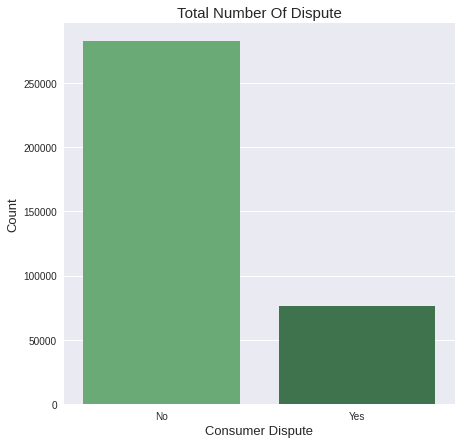

In [42]:
# Total number of dispute vs no dispute 
plt.style.use('seaborn')
plt.figure(figsize=(7,7))
sns.countplot(x='Consumer disputed?',data=train_data ,palette='Greens_d')
plt.title('Total Number Of Dispute', fontsize=15)
plt.xlabel('Consumer Dispute', fontsize=13)
plt.ylabel('Count', fontsize=13)
plt.show()

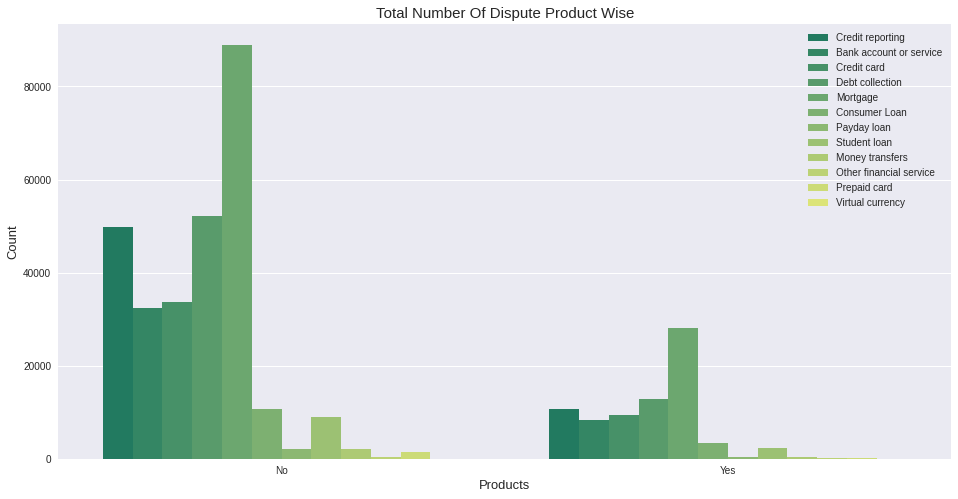

In [43]:
# Total no of disputes products-wise with dispute or no dispute 
plt.figure(figsize=(16,8))
sns.countplot(x='Consumer disputed?', hue='Product',data=train_data,palette='summer')
plt.title('Total Number Of Dispute Product Wise', fontsize=15)
plt.xlabel('Products',fontsize=13)
plt.ylabel('Count', fontsize=13)
plt.legend()
plt.show()

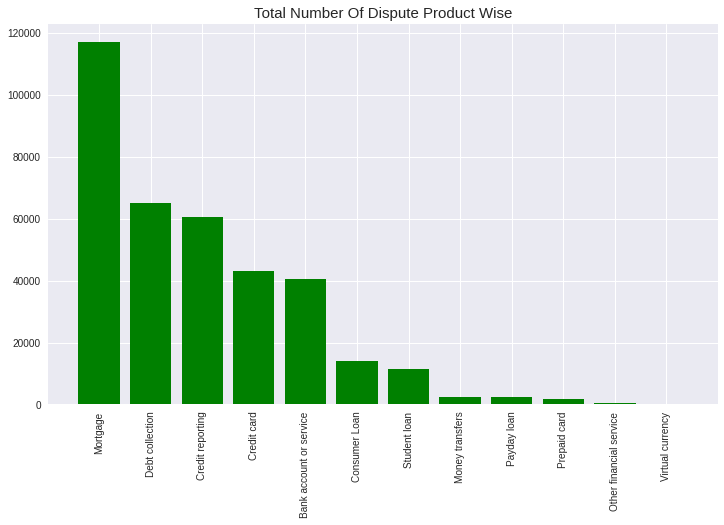

In [44]:
# Maximum no of disputes products-wise
plt.figure(figsize=(12,7))
product = train_data['Product'].value_counts().index
product_values = train_data['Product'].value_counts().values
plt.bar(product,product_values,color=['green'])
plt.title('Total Number Of Dispute Product Wise', fontsize=15)
plt.xticks(rotation=90)
plt.show()

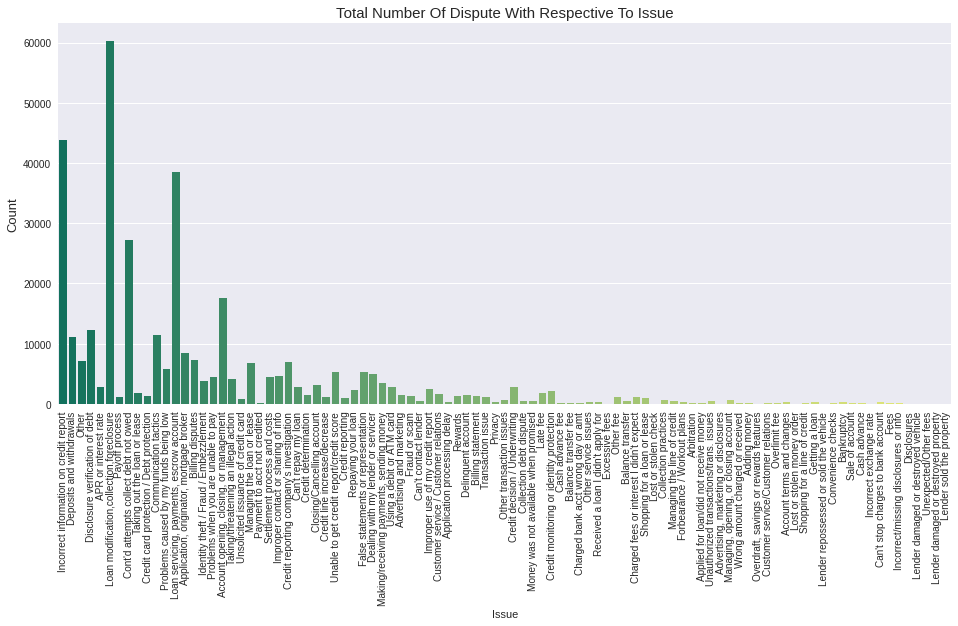

In [45]:
# Total no of disputes with Top Issues by Highest Disputes
plt.figure(figsize=(16,7))
sns.countplot(x='Issue',data=train_data,palette='summer')
plt.title('Total Number Of Dispute With Respective To Issue', fontsize=15)
plt.ylabel('Count', fontsize=13)
plt.xticks(rotation=90)
plt.show()

In [46]:
# Top 10 issue
top_issue=train_data['Issue'].value_counts().head(10)
top_issue=top_issue.to_frame()
top_issue

,Issue
"Loan modification,collection,foreclosure",60185
Incorrect information on credit report,43825
"Loan servicing, payments, escrow account",38456
Cont'd attempts collect debt not owed,27266
"Account opening, closing, or management",17557
Disclosure verification of debt,12283
Communication tactics,11457
Deposits and withdrawals,11028
"Application, originator, mortgage broker",8441
Billing disputes,7244


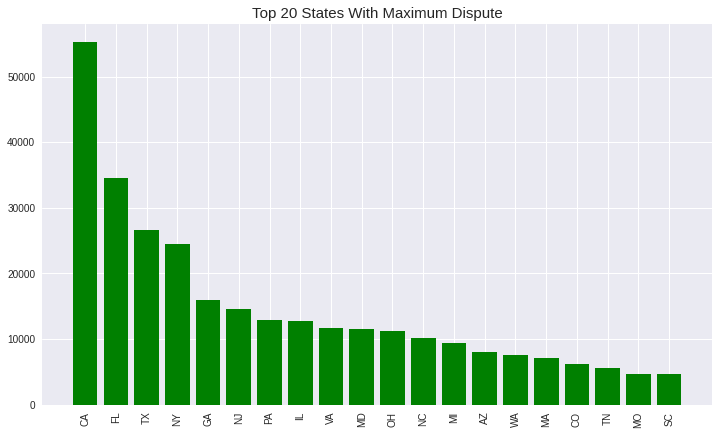

In [47]:
# Number of disputes by State with Maximum Disputes (top 20 )
plt.figure(figsize=(12,7))
state_dispute = train_data['State'].value_counts()[0:20].index
state_values = train_data['State'].value_counts()[0:20].values
plt.bar(state_dispute,state_values,color=['green'])
plt.title('Top 20 States With Maximum Dispute', fontsize=15)
plt.xticks(rotation=90)
plt.show()

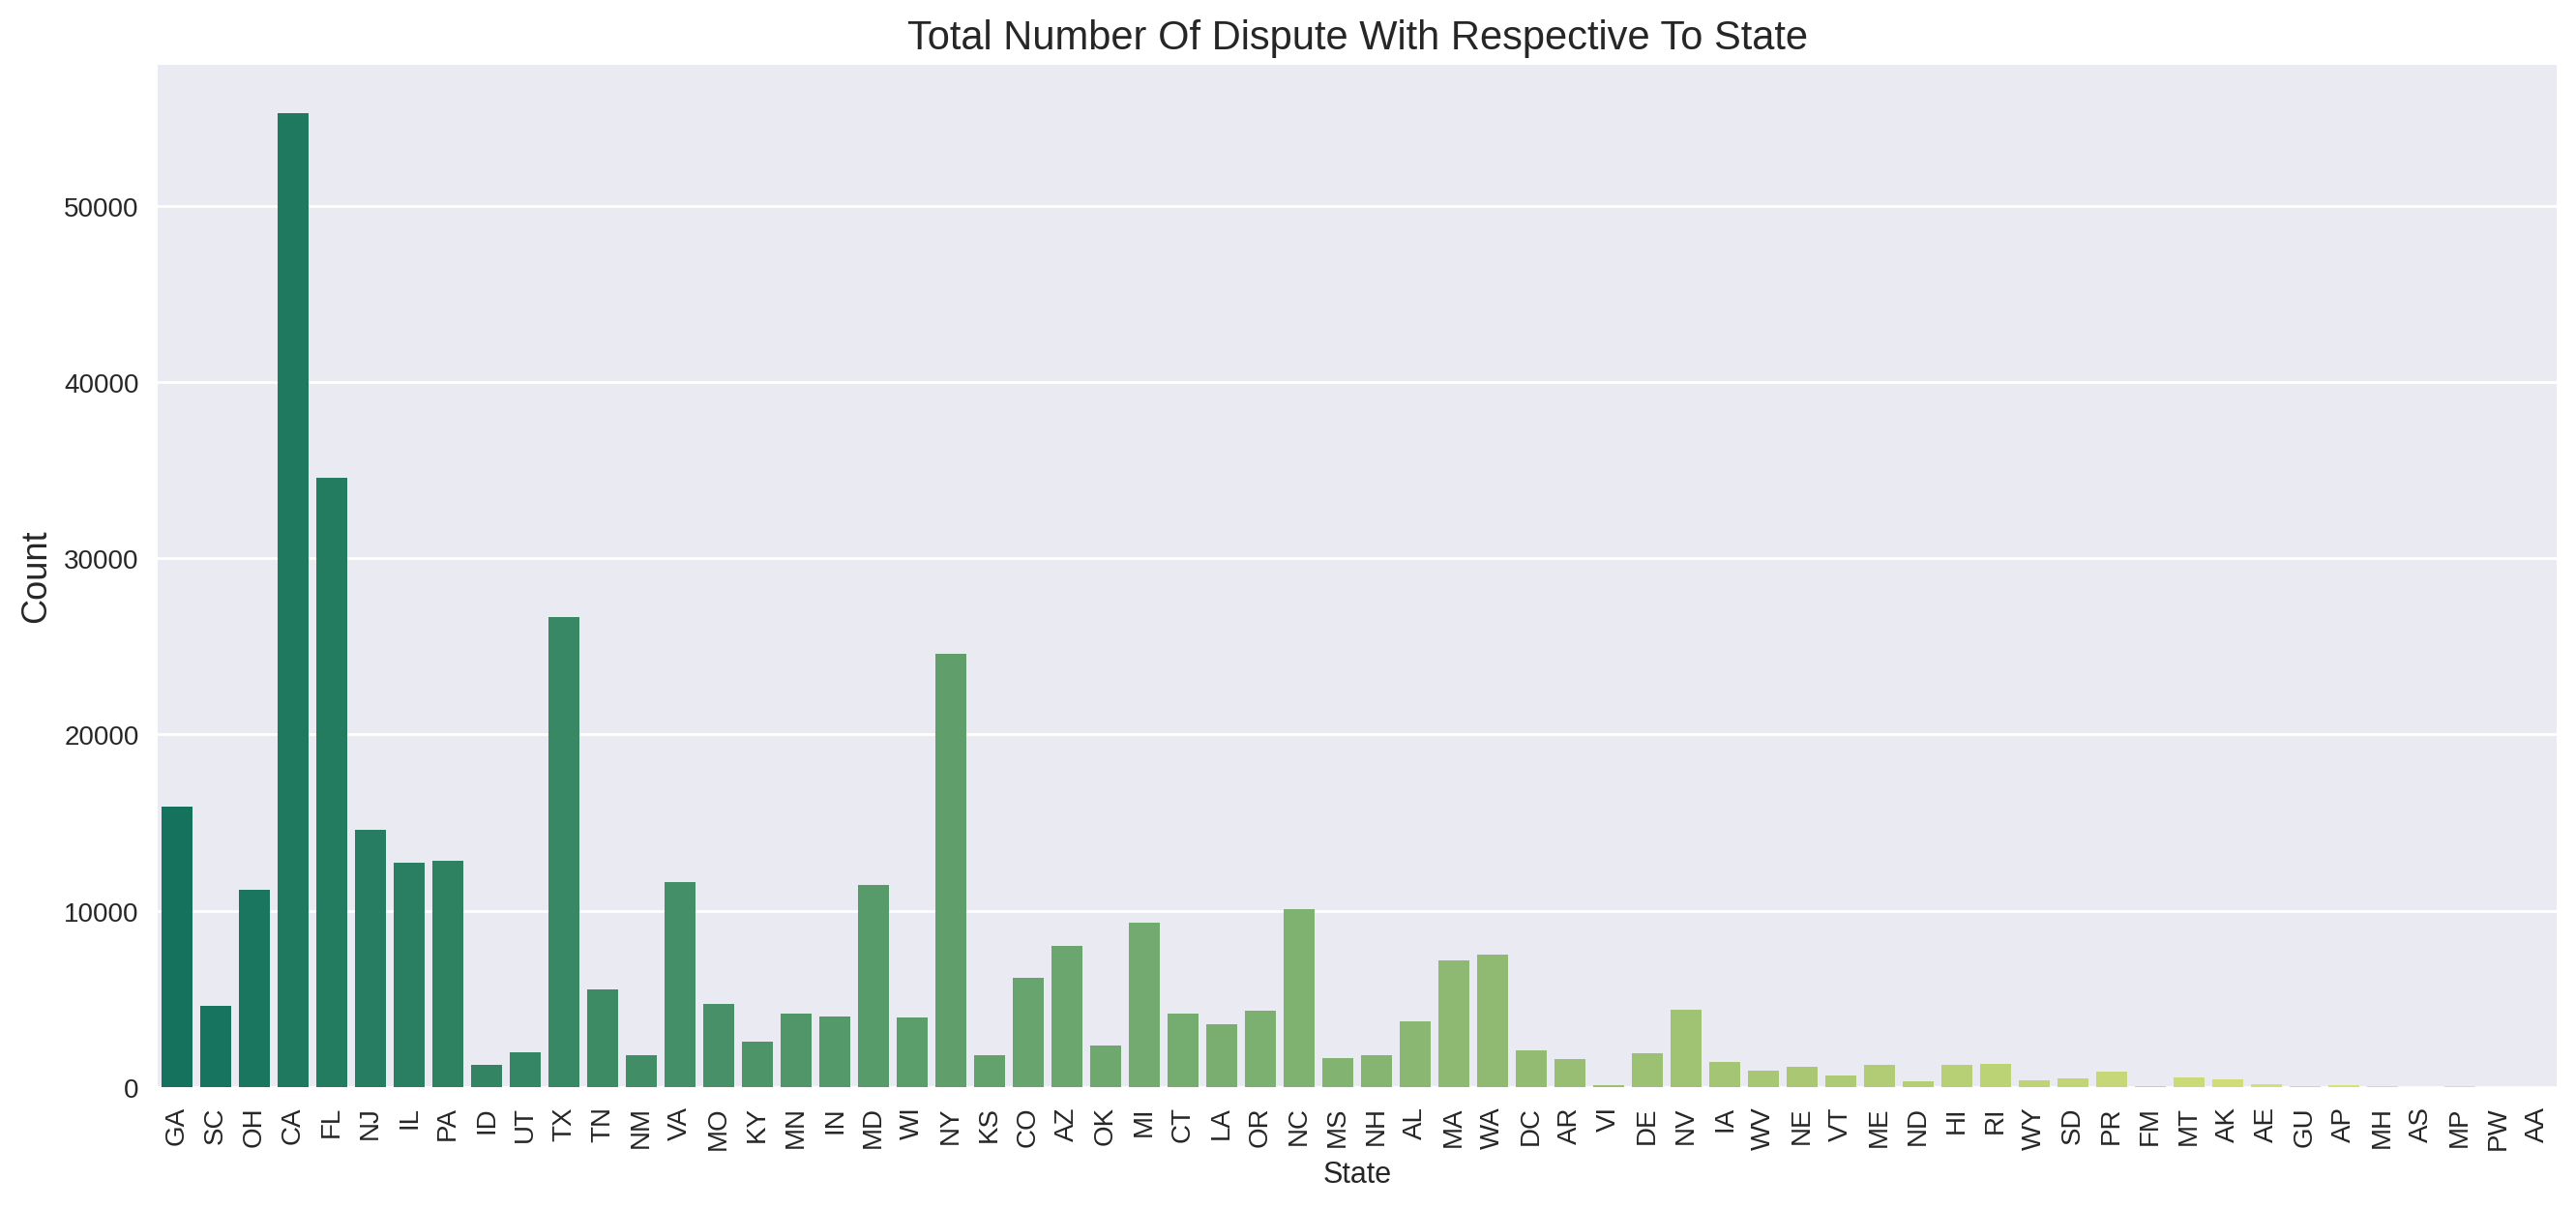

In [48]:
# Total no of disputes by State with Maximum Disputes
plt.figure(figsize=(16,7),dpi=200)
sns.countplot(x='State',data=train_data,palette='summer')
plt.title('Total Number Of Dispute With Respective To State', fontsize=15)
plt.ylabel('Count',fontsize=13)
plt.xticks(rotation=90)
plt.show()

In [49]:
# Top 10 state with highest dispute
train_data['State'].value_counts().head(10)

CA    55271
FL    34567
TX    26683
NY    24554
GA    15886
NJ    14571
PA    12834
IL    12745
VA    11645
MD    11456
Name: State, dtype: int64

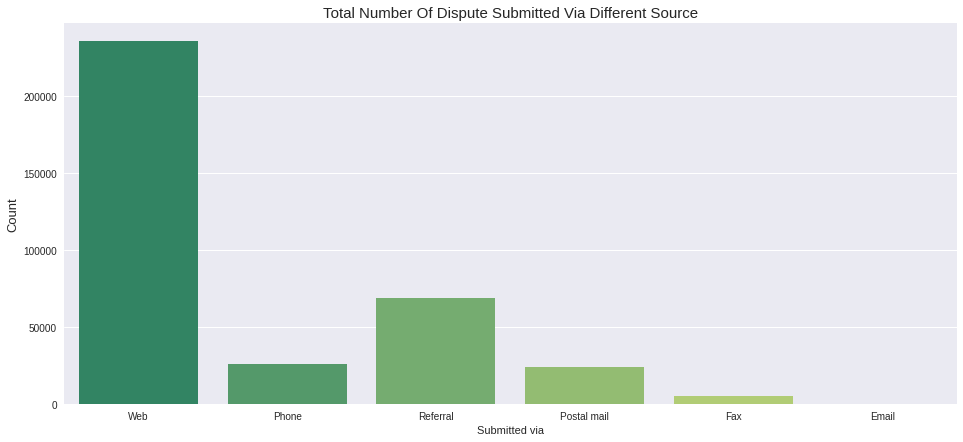

In [50]:
# Total no of disputes Submitted Via diffrent source
plt.figure(figsize=(16,7))
sns.countplot(x='Submitted via',data=train_data,palette='summer')
plt.title('Total Number Of Dispute Submitted Via Different Source', fontsize=15)
plt.ylabel('Count',fontsize=13)
plt.show()

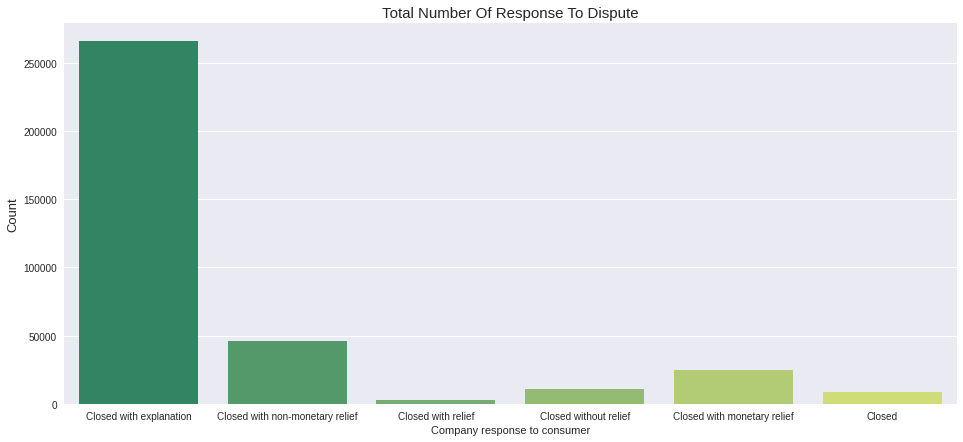

In [51]:
# Company's Response to the Complaints
plt.figure(figsize=(16,7))
sns.countplot(x='Company response to consumer',data=train_data,palette='summer')
plt.title('Total Number Of Response To Dispute', fontsize=15)
plt.ylabel('Count',fontsize=13)
plt.show()

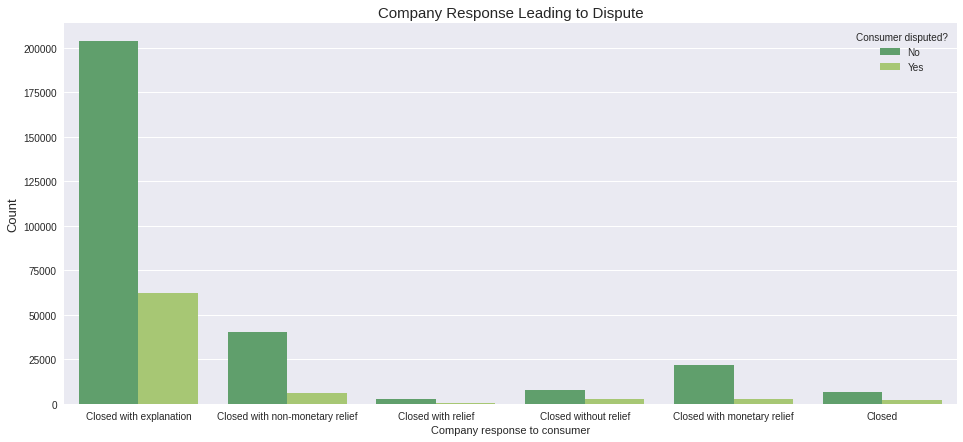

In [52]:
# Company's Response Leading to Disputes
plt.figure(figsize=(16,7))
sns.countplot(x='Company response to consumer', data=train_data, hue='Consumer disputed?',palette='summer')
plt.title('Company Response Leading to Dispute', fontsize=15)
plt.ylabel('Count',fontsize=13)
plt.show()

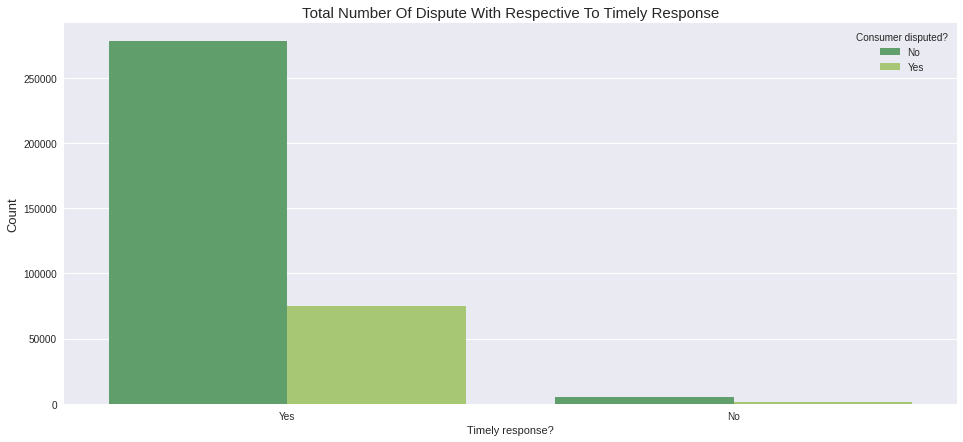

In [53]:
# Total number of dispute with respective to  Timely Response
plt.figure(figsize=(16,7))
sns.countplot(x='Timely response?', data=train_data, hue='Consumer disputed?',palette='summer')
plt.title('Total Number Of Dispute With Respective To Timely Response', fontsize=15)
plt.ylabel('Count',fontsize=13)
plt.show()

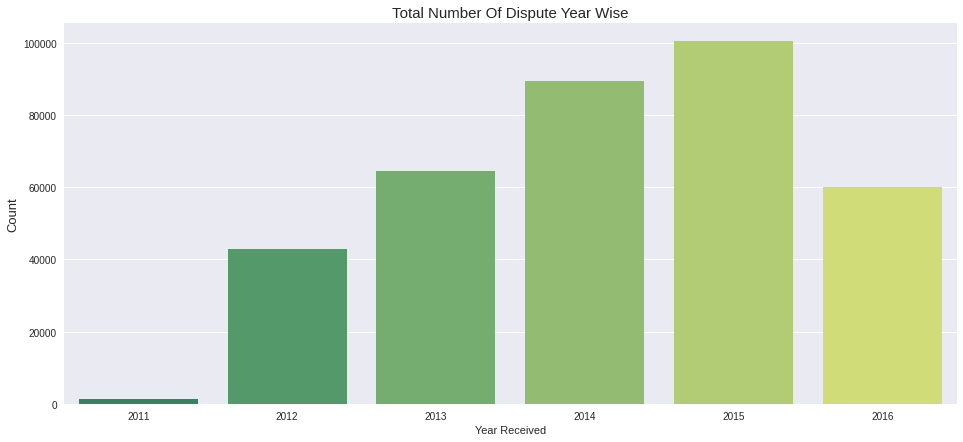

In [54]:
#  Year Wise Complaints
plt.figure(figsize=(16,7))
sns.countplot(x='Year Received', data=train_data,palette='summer')
plt.title('Total Number Of Dispute Year Wise', fontsize=15)
plt.ylabel('Count',fontsize=13)
plt.show()

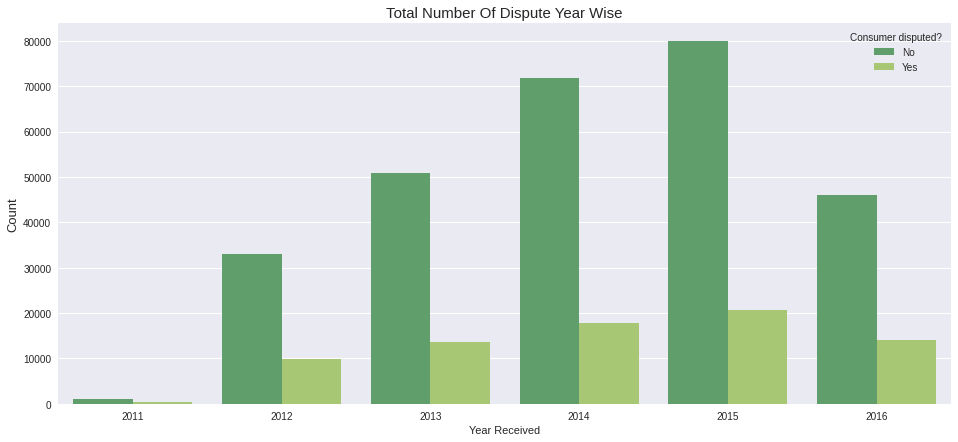

In [55]:
# Total no of disputes over Year Wise Complaints
plt.figure(figsize=(16,7))
sns.countplot(x='Year Received',hue='Consumer disputed?', data=train_data,palette='summer')
plt.title('Total Number Of Dispute Year Wise', fontsize=15)
plt.ylabel('Count',fontsize=13)
plt.show()

In [56]:
# Top 20 companys with highest compalaints
company = train_data['Company'].value_counts().head(20).index
num_of_complaints = train_data['Company'].value_counts().head(20).values
company_df = pd.DataFrame({'Company': company, 'Number of complaints': num_of_complaints})
company_df

,Company,Number of complaints
0,Bank of America,34903
1,Wells Fargo & Company,26490
2,JPMorgan Chase & Co.,21677
3,Equifax,21489
4,Experian,20075
5,"TransUnion Intermediate Holdings, Inc.",16881
6,Citibank,16792
7,Ocwen,13110
8,Capital One,10082
9,Nationstar Mortgage,8414


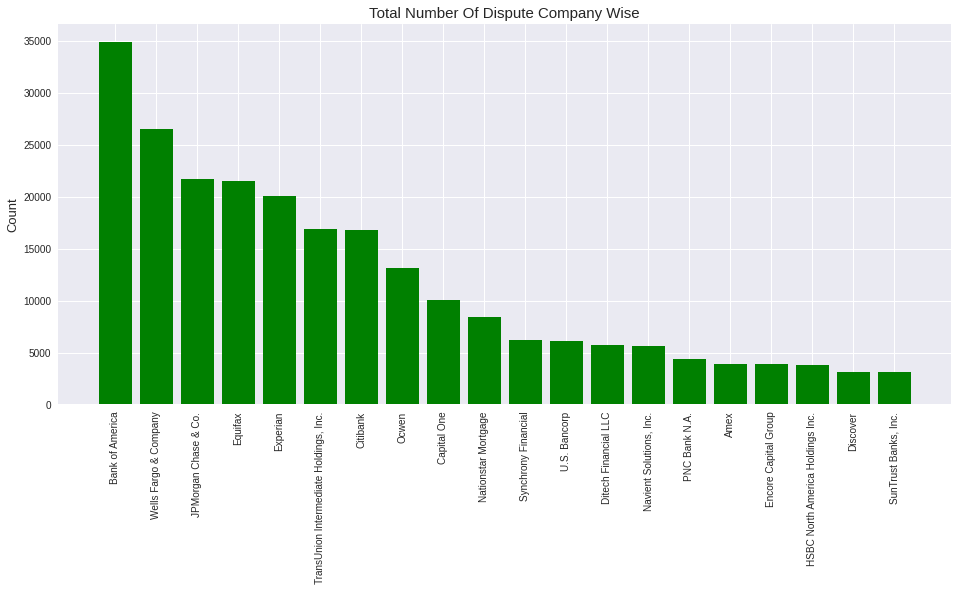

In [57]:
# Top 20 companies with highest complaints
plt.figure(figsize=(16,7))
plt.bar(x='Company',height='Number of complaints',data=company_df,color=['green'])
plt.title('Total Number Of Dispute Company Wise', fontsize=15)
plt.ylabel('Count',fontsize=13)
plt.xticks(rotation=90)
plt.show()

## Data Visualization understanding


1.   The number of consumer dispute is less compare to consumer with no dispute
2. The product that is causing most of the dispute is mortgage
3. Loan modification,collection for clouser is the top issue of dispute
4. CA is the state with maximum dispute 
5. Via web the highest number of dispute are submitted
6. Most number of complaints have been closed with explanation
7. Bank of America is the company with highest complaints




In [58]:
# Days Held "Column Analysis" for train dataset
pd.DataFrame(train_data['Days held'].describe())

,Days held
count,358810.000000
mean,4.456339
std,16.741676
min,-1.000000
25%,0.000000
50%,1.000000
75%,4.000000
max,993.000000


In [59]:
# Days Held "Column Analysis" for test dataset
pd.DataFrame(test_data['Days held'].describe())

,Days held
count,119606.000000
mean,4.443607
std,16.233377
min,-1.000000
25%,0.000000
50%,1.000000
75%,4.000000
max,832.000000


In [60]:
#Convert Negative Days Held to Zero for train dataset 
#because time taken by authority can't be negative 
train_data['Days held']=train_data['Days held'].mask(train_data['Days held'].lt(0),0)
train_data['Days held'].describe()

count    358810.000000
mean          4.467863
std          16.738260
min           0.000000
25%           0.000000
50%           1.000000
75%           4.000000
max         993.000000
Name: Days held, dtype: float64

In [61]:
#Convert Negative Days Held to Zero for test dataset 
#because time taken by authority can't be negative 
test_data['Days held']=test_data['Days held'].mask(test_data['Days held'].lt(0),0)
test_data['Days held'].describe()

count    119606.000000
mean          4.455178
std          16.229849
min           0.000000
25%           0.000000
50%           1.000000
75%           4.000000
max         832.000000
Name: Days held, dtype: float64

In [62]:
# Train dataset
train_data.head(3)

,Product,Issue,Company,State,Submitted via,Company response to consumer,Timely response?,Consumer disputed?,Year Received,Month Received,Days held,Week Received
0,Credit reporting,Incorrect information on credit report,Equifax,GA,Web,Closed with explanation,Yes,No,2015,10,0,2
1,Bank account or service,Deposits and withdrawals,Wells Fargo & Company,GA,Web,Closed with explanation,Yes,Yes,2015,4,0,4
2,Credit card,Other,Citibank,SC,Phone,Closed with non-monetary relief,Yes,No,2013,12,14,3


In [63]:
# Test dataset
test_data.head(3)

,Product,Issue,Company,State,Submitted via,Company response to consumer,Timely response?,Year Received,Month Received,Days held,Week Received
0,Credit card,Customer service / Customer relations,Citibank,TX,Web,Closed with monetary relief,Yes,2015,1,0,3
1,Consumer Loan,Payment to acct not credited,"Larsen MacColl Partners II, L.P.",TX,Phone,Closed with explanation,Yes,2016,6,0,4
2,Credit card,Credit line increase/decrease,Capital One,NC,Web,Closed with explanation,Yes,2015,9,0,1


In [64]:
# Droping the Unnecessary Columns for  Model Building train dataset
train_data = train_data.drop(['Company','State','Year Received','Month Received',
                              'Days held','Week Received'],axis=1)
train_data.head(2)

,Product,Issue,Submitted via,Company response to consumer,Timely response?,Consumer disputed?
0,Credit reporting,Incorrect information on credit report,Web,Closed with explanation,Yes,No
1,Bank account or service,Deposits and withdrawals,Web,Closed with explanation,Yes,Yes


In [65]:
# Droping the Unnecessary Columns for the Model Building test dataset
test_data = test_data.drop(['Company','State','Year Received','Month Received',
                              'Days held','Week Received'],axis=1)
test_data.head(2)

,Product,Issue,Submitted via,Company response to consumer,Timely response?
0,Credit card,Customer service / Customer relations,Web,Closed with monetary relief,Yes
1,Consumer Loan,Payment to acct not credited,Phone,Closed with explanation,Yes


In [66]:
# Changeing Consumer Disputed Column to 0 and 1(yes to 1, and no to 0) in train dataset
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
train_data['Consumer disputed?'] = labelencoder.fit_transform(train_data['Consumer disputed?'])
train_data.head()

,Product,Issue,Submitted via,Company response to consumer,Timely response?,Consumer disputed?
0,Credit reporting,Incorrect information on credit report,Web,Closed with explanation,Yes,0
1,Bank account or service,Deposits and withdrawals,Web,Closed with explanation,Yes,1
2,Credit card,Other,Phone,Closed with non-monetary relief,Yes,0
3,Debt collection,Disclosure verification of debt,Referral,Closed with explanation,Yes,0
4,Debt collection,Disclosure verification of debt,Web,Closed with explanation,Yes,1


In [67]:
train_data['Consumer disputed?'].value_counts()

0    282638
1     76172
Name: Consumer disputed?, dtype: int64

In [68]:
# Createing Dummy Variables for categorical features for train dataset
dummies= pd.get_dummies(train_data[['Product','Submitted via','Company response to consumer',
                                   'Timely response?']])
dummies.head()

,Product_Bank account or service,Product_Consumer Loan,Product_Credit card,Product_Credit reporting,Product_Debt collection,Product_Money transfers,Product_Mortgage,Product_Other financial service,Product_Payday loan,Product_Prepaid card,...,Submitted via_Referral,Submitted via_Web,Company response to consumer_Closed,Company response to consumer_Closed with explanation,Company response to consumer_Closed with monetary relief,Company response to consumer_Closed with non-monetary relief,Company response to consumer_Closed with relief,Company response to consumer_Closed without relief,Timely response?_No,Timely response?_Yes
0,0,0,0,1,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
1,1,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,0,0,0,0,1,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1
4,0,0,0,0,1,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1


In [69]:
# Dummies columns 
dummies.columns     

Index(['Product_Bank account or service', 'Product_Consumer Loan',
       'Product_Credit card', 'Product_Credit reporting',
       'Product_Debt collection', 'Product_Money transfers',
       'Product_Mortgage', 'Product_Other financial service',
       'Product_Payday loan', 'Product_Prepaid card', 'Product_Student loan',
       'Product_Virtual currency', 'Submitted via_Email', 'Submitted via_Fax',
       'Submitted via_Phone', 'Submitted via_Postal mail',
       'Submitted via_Referral', 'Submitted via_Web',
       'Company response to consumer_Closed',
       'Company response to consumer_Closed with explanation',
       'Company response to consumer_Closed with monetary relief',
       'Company response to consumer_Closed with non-monetary relief',
       'Company response to consumer_Closed with relief',
       'Company response to consumer_Closed without relief',
       'Timely response?_No', 'Timely response?_Yes'],
      dtype='object')

In [70]:
# droping the converted columns
train_data = train_data.drop(['Product','Submitted via','Company response to consumer',
                                   'Timely response?'],axis = 1)
# concatenating the dummie variabel to dataframe
train_data = train_data.join(dummies)
train_data.head(2)

,Issue,Consumer disputed?,Product_Bank account or service,Product_Consumer Loan,Product_Credit card,Product_Credit reporting,Product_Debt collection,Product_Money transfers,Product_Mortgage,Product_Other financial service,...,Submitted via_Referral,Submitted via_Web,Company response to consumer_Closed,Company response to consumer_Closed with explanation,Company response to consumer_Closed with monetary relief,Company response to consumer_Closed with non-monetary relief,Company response to consumer_Closed with relief,Company response to consumer_Closed without relief,Timely response?_No,Timely response?_Yes
0,Incorrect information on credit report,0,0,0,0,1,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
1,Deposits and withdrawals,1,1,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1


In [71]:
# Createing Dummy Variables for categorical features for test dataset
dummies2= pd.get_dummies(test_data[['Product','Submitted via','Company response to consumer',
                                   'Timely response?']])
# droping the converted columns
test_data = test_data.drop(['Product','Submitted via','Company response to consumer',
                                   'Timely response?'],axis = 1)
# concatenating the dummie variabel to dataframe
test_data = test_data.join(dummies2)
test_data.head(2)

,Issue,Product_Bank account or service,Product_Consumer Loan,Product_Credit card,Product_Credit reporting,Product_Debt collection,Product_Money transfers,Product_Mortgage,Product_Other financial service,Product_Payday loan,...,Submitted via_Referral,Submitted via_Web,Company response to consumer_Closed,Company response to consumer_Closed with explanation,Company response to consumer_Closed with monetary relief,Company response to consumer_Closed with non-monetary relief,Company response to consumer_Closed with relief,Company response to consumer_Closed without relief,Timely response?_No,Timely response?_Yes
0,Customer service / Customer relations,0,0,1,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,1
1,Payment to acct not credited,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [72]:
# Test dataset columns
test_data.columns

Index(['Issue', 'Product_Bank account or service', 'Product_Consumer Loan',
       'Product_Credit card', 'Product_Credit reporting',
       'Product_Debt collection', 'Product_Money transfers',
       'Product_Mortgage', 'Product_Other financial service',
       'Product_Payday loan', 'Product_Prepaid card', 'Product_Student loan',
       'Product_Virtual currency', 'Submitted via_Email', 'Submitted via_Fax',
       'Submitted via_Phone', 'Submitted via_Postal mail',
       'Submitted via_Referral', 'Submitted via_Web',
       'Company response to consumer_Closed',
       'Company response to consumer_Closed with explanation',
       'Company response to consumer_Closed with monetary relief',
       'Company response to consumer_Closed with non-monetary relief',
       'Company response to consumer_Closed with relief',
       'Company response to consumer_Closed without relief',
       'Timely response?_No', 'Timely response?_Yes'],
      dtype='object')

In [73]:
# Standard import for NLP
import nltk
from nltk.corpus import wordnet as wn
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.tokenize import wordpunct_tokenize
from nltk.tokenize import sent_tokenize
import re
import string
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [74]:
# Text pre-processing with the help of NLP for "Issue" column for both test and train dataset
relevant_text_train = train_data['Issue']
relevant_text_test = test_data['Issue']
# Tokenization
tokenized_data_train = relevant_text_train.apply(lambda x: wordpunct_tokenize(x.lower()))
tokenized_data_test = relevant_text_test.apply(lambda x: wordpunct_tokenize(x.lower()))
# Removing Punctuation
def remove_punctuation(text):
    no_punctuation = []
    for w in text:
        if w not in string.punctuation:
            no_punctuation.append(w)
    return no_punctuation
no_punctuation_data_train = tokenized_data_train.apply(lambda x: remove_punctuation(x))
no_punctuation_data_test = tokenized_data_test.apply(lambda x: remove_punctuation(x))
# Removing Stopwords 
stop_words = stopwords.words('english')
filtered_sentence_train = [w for w in no_punctuation_data_train if not w in stop_words]
filtered_sentence_train = pd.Series(filtered_sentence_train)
filtered_sentence_test = [w for w in no_punctuation_data_test if not w in stop_words]
filtered_sentence_test = pd.Series(filtered_sentence_test)
# Lemmatization
def lemmatize_text(text):
    lem_text = [WordNetLemmatizer().lemmatize(w,pos = 'v') for w in text]
    return lem_text
lemmatized_data_train = filtered_sentence_train.apply(lambda x:lemmatize_text(x))
lemmatized_data_test = filtered_sentence_test.apply(lambda x:lemmatize_text(x))
# Steming
def stem_text(text):
    stem_text = [PorterStemmer().stem(w) for w in text]
    return stem_text
stemmed_data_train = lemmatized_data_train.apply(lambda x:stem_text(x))
stemmed_data_test = lemmatized_data_test.apply(lambda x:stem_text(x))
def word_to_sentence(text):
    text_sentence = " ".join(text)
    return text_sentence
clean_data_train = stemmed_data_train.apply(lambda x:word_to_sentence(x))
clean_data_test = stemmed_data_test.apply(lambda x:word_to_sentence(x))

In [75]:
# Converting the processed data into dataframe and droping the old column
train_data['Issues_cleaned'] = clean_data_train
test_data['Issues_cleaned'] = clean_data_test
train_data = train_data.drop('Issue', axis = 1)
test_data = test_data.drop('Issue', axis = 1)

In [76]:
# Cleaned issues of train set
train_data['Issues_cleaned'].head()

0    incorrect inform on credit report
1                 deposit and withdraw
2                                other
3              disclosur verif of debt
4              disclosur verif of debt
Name: Issues_cleaned, dtype: object

In [77]:
# Cleaned issues of test set
test_data['Issues_cleaned'].head()

0          custom servic custom relat
1          payment to acct not credit
2         credit line increas decreas
3    problem when you be unabl to pay
4     improp contact or share of info
Name: Issues_cleaned, dtype: object

In [78]:
# Calculating TF-IDF for identify the most important words and phrases in shape of vectors
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer()
issues_cleaned_train = tf.fit_transform(train_data['Issues_cleaned']).toarray()
issues_cleaned_test = tf.fit_transform(test_data['Issues_cleaned']).toarray()
tf_columns_train = []
tf_columns_test = []
for i in range(issues_cleaned_train.shape[1]):
    tf_columns_train.append('Feature' + str(i+1))
for i in range(issues_cleaned_test.shape[1]):
    tf_columns_test.append('Feature' + str(i+1))
issues_train = pd.DataFrame(issues_cleaned_train, columns = tf_columns_train)
issues_test = pd.DataFrame(issues_cleaned_test, columns = tf_columns_test)
weights = pd.DataFrame(tf.idf_, index = tf.get_feature_names(), columns = ['Idf_weights']).sort_values(by = 'Idf_weights', ascending = False)
weights.head()

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,Idf_weights
exchang,11.998819
damag,11.593354
destroy,11.593354
overdraft,11.305672
featur,11.305672


In [79]:
# Replacing Issues_cleaned by Vectorized Issues
train_data = train_data.drop('Issues_cleaned', axis = 1)
test_data = test_data.drop('Issues_cleaned', axis = 1)
train_data = pd.concat([train_data, issues_train], axis = 1)
test_data = pd.concat([test_data, issues_test], axis = 1)
Feature168 = [0] * 119606
test_data['Feature168'] = Feature168

In [80]:
train_data.head()

,Consumer disputed?,Product_Bank account or service,Product_Consumer Loan,Product_Credit card,Product_Credit reporting,Product_Debt collection,Product_Money transfers,Product_Mortgage,Product_Other financial service,Product_Payday loan,...,Feature159,Feature160,Feature161,Feature162,Feature163,Feature164,Feature165,Feature166,Feature167,Feature168
0,0,0,0,0,1,0,0,0,0,0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,1,1,0,0,0,0,0,0,0,0,...,0.0,0.0,0.000000,0.0,0.0,0.596349,0.0,0.0,0.0,0.0
2,0,0,0,1,0,0,0,0,0,0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3,0,0,0,0,0,1,0,0,0,0,...,0.0,0.0,0.551342,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4,1,0,0,0,0,1,0,0,0,0,...,0.0,0.0,0.551342,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


In [81]:
test_data.head()

,Product_Bank account or service,Product_Consumer Loan,Product_Credit card,Product_Credit reporting,Product_Debt collection,Product_Money transfers,Product_Mortgage,Product_Other financial service,Product_Payday loan,Product_Prepaid card,...,Feature159,Feature160,Feature161,Feature162,Feature163,Feature164,Feature165,Feature166,Feature167,Feature168
0,0,0,1,0,0,0,0,0,0,0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0
1,0,1,0,0,0,0,0,0,0,0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0
2,0,0,1,0,0,0,0,0,0,0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0
3,0,1,0,0,0,0,0,0,0,0,...,0.0,0.0,0.406735,0.0,0.0,0.0,0.0,0.413484,0.0,0
4,0,0,0,0,1,0,0,0,0,0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0


In [82]:
# shape of new train and test dataset
train_data.shape  , test_data.shape

((358810, 195), (119606, 194))

## Feature Engineering 

In [83]:
# target column
target_lable = train_data['Consumer disputed?']

In [84]:
target_lable.shape

(358810,)

In [85]:
# discarding the  dependent variable before doing standardization
train_data = train_data.drop('Consumer disputed?',axis=1)

In [86]:
train_data.shape

(358810, 194)

In [87]:
# Scaleing the data using the Standard Scaler to create a scaled DataFrame for train dataset
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# scaleing the data
scaled_data_train = scaler.fit_transform(train_data)

# createing the dataframe of scled data
scaled_data_train = pd.DataFrame(scaled_data_train, columns = train_data.columns)
scaled_data_train.head(2)

,Product_Bank account or service,Product_Consumer Loan,Product_Credit card,Product_Credit reporting,Product_Debt collection,Product_Money transfers,Product_Mortgage,Product_Other financial service,Product_Payday loan,Product_Prepaid card,...,Feature159,Feature160,Feature161,Feature162,Feature163,Feature164,Feature165,Feature166,Feature167,Feature168
0,-0.357528,-0.20123,-0.369551,2.216739,-0.470498,-0.083797,-0.695885,-0.032774,-0.082489,-0.068402,...,-0.12146,-0.009442,-0.188271,-0.116971,-0.118067,-0.178072,-0.028441,-0.026961,-0.111294,-0.080004
1,2.796985,-0.20123,-0.369551,-0.451113,-0.470498,-0.083797,-0.695885,-0.032774,-0.082489,-0.068402,...,-0.12146,-0.009442,-0.188271,-0.116971,-0.118067,5.615716,-0.028441,-0.026961,-0.111294,-0.080004


In [88]:
# Scaleing the data using the Standard Scaler to create a scaled DataFrame for test dataset
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# scaleing the data
scaled_data_test = scaler.fit_transform(test_data)

#createing the dataframe of scled data
scaled_data_test = pd.DataFrame(scaled_data_test, columns = test_data.columns)

In [89]:
scaled_data_test.head(2)

,Product_Bank account or service,Product_Consumer Loan,Product_Credit card,Product_Credit reporting,Product_Debt collection,Product_Money transfers,Product_Mortgage,Product_Other financial service,Product_Payday loan,Product_Prepaid card,...,Feature159,Feature160,Feature161,Feature162,Feature163,Feature164,Feature165,Feature166,Feature167,Feature168
0,-0.3602,-0.200785,2.719731,-0.45399,-0.468281,-0.084452,-0.697012,-0.031954,-0.081749,-0.068278,...,-0.010016,-0.184854,-0.118979,-0.113719,-0.178494,-0.0295,-0.02528,-0.11387,-0.077057,0.0
1,-0.3602,4.980458,-0.367683,-0.45399,-0.468281,-0.084452,-0.697012,-0.031954,-0.081749,-0.068278,...,-0.010016,-0.184854,-0.118979,-0.113719,-0.178494,-0.0295,-0.02528,-0.11387,-0.077057,0.0


In [90]:
# feature selection with pcs
from sklearn.decomposition import PCA

# initialize pca model
# We will select the features that are explaining more than 80% of variance 
pca = PCA(n_components=0.8)

# fit and transform data with pca
pca_data_train = pca.fit_transform(scaled_data_train)


In [91]:
#pca data shape
pca_data_train.shape

(358810, 53)

In [92]:
# Explained variance 
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.03555381, 0.03393639, 0.03192164, 0.02709973, 0.02501792,
       0.02396899, 0.02217988, 0.02198982, 0.02146391, 0.02090472,
       0.02041661, 0.02018025, 0.01964569, 0.01838467, 0.01742465,
       0.0165671 , 0.01604921, 0.01590749, 0.01563936, 0.01551014,
       0.01526015, 0.01521452, 0.01515745, 0.01472968, 0.01452275,
       0.01405667, 0.01399473, 0.01363981, 0.01288844, 0.01222617,
       0.0119352 , 0.01170171, 0.01121802, 0.01090318, 0.01078406,
       0.01066809, 0.01065652, 0.01053234, 0.01048142, 0.01038532,
       0.01033007, 0.01030818, 0.01011007, 0.00983871, 0.00974249,
       0.00936159, 0.0089556 , 0.00860133, 0.00831728, 0.00804043,
       0.00782794, 0.00771547, 0.00736522])

In [93]:
from tables import Column
# create the new data frame with orignal data frame
pca_df_train = pd.DataFrame(pca_data_train)

In [94]:
# From 195 feature now we have 53 feature which explain more than 80% of data
pca_df_train.head()

,0,1,2,3,4,5,6,7,8,9,...,43,44,45,46,47,48,49,50,51,52
0,5.414890,-2.202455,-1.161637,0.616390,-0.449950,-1.050562,-0.100449,-0.561275,0.302757,0.188793,...,-0.005226,-0.219223,-0.113948,0.608125,0.035124,-0.503320,0.298947,-0.838069,0.327897,0.032412
1,-0.184631,1.015138,-0.115997,-2.087276,-1.109526,-0.419679,-2.287205,0.735609,-0.710220,-0.165943,...,0.029540,-0.071987,-0.141153,0.630711,-0.265137,-0.487891,0.456216,-1.920350,0.717808,0.073174
2,0.162757,0.007910,-0.035358,-0.794220,-0.292239,0.219790,-0.520243,0.907475,-0.153426,-0.713341,...,-0.011923,-0.000769,0.620723,-1.257864,1.777640,1.036790,-1.413851,2.048324,-1.024978,0.263682
3,-0.843934,-1.075771,3.483224,-0.482445,-0.656600,0.146019,1.116360,-0.180577,-1.057795,0.348050,...,-0.015018,0.072011,-0.112538,0.125078,0.210966,-0.231694,-0.306488,1.335260,-0.457493,0.122688
4,-0.527790,-1.252422,3.857994,-0.530880,-0.458347,0.285234,1.531669,-0.097778,-1.026735,0.625328,...,-0.009975,0.010822,-0.091395,0.179436,-0.143611,-0.191227,0.217156,-0.913828,0.243827,0.022691


In [95]:
# Adding back the target lable to the dataframe
pca_df_train['Consumer disputed?']  = target_lable
pca_df_train.head()

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,Consumer disputed?
0,5.414890,-2.202455,-1.161637,0.616390,-0.449950,-1.050562,-0.100449,-0.561275,0.302757,0.188793,...,-0.219223,-0.113948,0.608125,0.035124,-0.503320,0.298947,-0.838069,0.327897,0.032412,0
1,-0.184631,1.015138,-0.115997,-2.087276,-1.109526,-0.419679,-2.287205,0.735609,-0.710220,-0.165943,...,-0.071987,-0.141153,0.630711,-0.265137,-0.487891,0.456216,-1.920350,0.717808,0.073174,1
2,0.162757,0.007910,-0.035358,-0.794220,-0.292239,0.219790,-0.520243,0.907475,-0.153426,-0.713341,...,-0.000769,0.620723,-1.257864,1.777640,1.036790,-1.413851,2.048324,-1.024978,0.263682,0
3,-0.843934,-1.075771,3.483224,-0.482445,-0.656600,0.146019,1.116360,-0.180577,-1.057795,0.348050,...,0.072011,-0.112538,0.125078,0.210966,-0.231694,-0.306488,1.335260,-0.457493,0.122688,0
4,-0.527790,-1.252422,3.857994,-0.530880,-0.458347,0.285234,1.531669,-0.097778,-1.026735,0.625328,...,0.010822,-0.091395,0.179436,-0.143611,-0.191227,0.217156,-0.913828,0.243827,0.022691,1


In [96]:
pca_df_train.shape

(358810, 54)

In [97]:
# This is test data which we will use to make our final prediction 
scaled_data_test.shape

(119606, 194)

## Model Creation

In [98]:
# x input features 
x= pca_df_train.drop('Consumer disputed?',axis=1)
x.head(2)

,0,1,2,3,4,5,6,7,8,9,...,43,44,45,46,47,48,49,50,51,52
0,5.414890,-2.202455,-1.161637,0.616390,-0.449950,-1.050562,-0.100449,-0.561275,0.302757,0.188793,...,-0.005226,-0.219223,-0.113948,0.608125,0.035124,-0.503320,0.298947,-0.838069,0.327897,0.032412
1,-0.184631,1.015138,-0.115997,-2.087276,-1.109526,-0.419679,-2.287205,0.735609,-0.710220,-0.165943,...,0.029540,-0.071987,-0.141153,0.630711,-0.265137,-0.487891,0.456216,-1.920350,0.717808,0.073174


In [99]:
# y output(target) column
y = pca_df_train['Consumer disputed?']
y.head()

0    0
1    1
2    0
3    0
4    1
Name: Consumer disputed?, dtype: int64

In [100]:
y.value_counts()   # value count

0    282638
1     76172
Name: Consumer disputed?, dtype: int64

In [101]:
# split the data into train and test split
from sklearn.model_selection import train_test_split
# Train Test (80-20) split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [102]:
# view the shape of the data
x_train.shape,x_test.shape,y_train.shape,y_test.shape,scaled_data_test.shape

((287048, 53), (71762, 53), (287048,), (71762,), (119606, 194))

We will train the models with default value after finding the best model with highest accuracy we will finetune that model

In [103]:
# Logistic Regression model
from sklearn.linear_model import LogisticRegression

log_model= LogisticRegression()

log_model.fit(x_train,y_train)

LogisticRegression()

In [104]:
# Model performance 
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix
log_pred=log_model.predict(x_test)
log_score = accuracy_score(y_test,log_pred)
print("LogisticRegression Model Accuracy: ",log_score)

LogisticRegression Model Accuracy:  0.7876313369192609


In [105]:
# Classification report
print(classification_report(y_test,log_pred))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88     56522
           1       0.00      0.00      0.00     15240

    accuracy                           0.79     71762
   macro avg       0.39      0.50      0.44     71762
weighted avg       0.62      0.79      0.69     71762



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


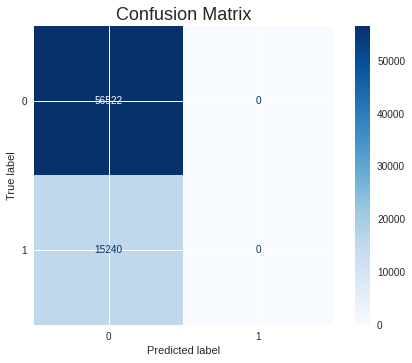

In [106]:
# Confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(log_model, x_test, y_test , cmap='Blues')
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [107]:
# DecisionTree Classifier Model
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train,y_train)
dt_pred = dt_model.predict(x_test)
dt_score = accuracy_score(y_test,dt_pred)
print(" DecisionTreeClassifier Model Accuracy: ",dt_score)

 DecisionTreeClassifier Model Accuracy:  0.7871436136116607


In [108]:
# Classification report
print(classification_report(y_test,dt_pred))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88     56522
           1       0.28      0.00      0.00     15240

    accuracy                           0.79     71762
   macro avg       0.53      0.50      0.44     71762
weighted avg       0.68      0.79      0.69     71762



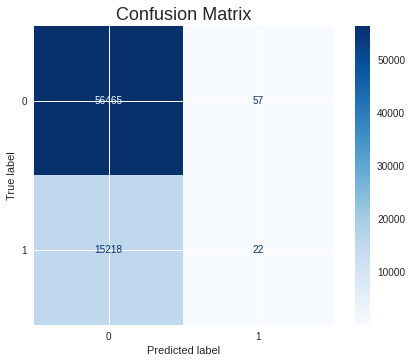

In [109]:
# Confusion Matrix
ConfusionMatrixDisplay.from_estimator(dt_model, x_test, y_test , cmap='Blues')
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [110]:
# RandomForest Classifier Model
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(x_train,y_train)
rf_pred = rf_model.predict(x_test)
rf_score= accuracy_score(y_test,rf_pred)
print(" RandomForestClassifier Model Accuracy: ",rf_score)

 RandomForestClassifier Model Accuracy:  0.7869903291435578


In [111]:
# Classification report
print(classification_report(y_test,rf_pred))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88     56522
           1       0.23      0.00      0.00     15240

    accuracy                           0.79     71762
   macro avg       0.51      0.50      0.44     71762
weighted avg       0.67      0.79      0.69     71762



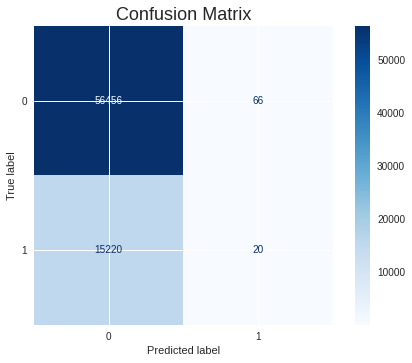

In [112]:
# Confusion Matrix
ConfusionMatrixDisplay.from_estimator(rf_model, x_test, y_test , cmap='Blues')
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [113]:
# AdaBoost Classifier Model
from sklearn.ensemble import AdaBoostClassifier
adb_model = AdaBoostClassifier()
adb_model.fit(x_train, y_train)
adb_pred = adb_model.predict(x_test)
adb_score= accuracy_score(y_test,adb_pred)
print(" AdaBoostClassifier Model Accuracy: ",adb_score)

 AdaBoostClassifier Model Accuracy:  0.7876174019676152


In [114]:
# Classification report
print(classification_report(y_test,adb_pred))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88     56522
           1       0.00      0.00      0.00     15240

    accuracy                           0.79     71762
   macro avg       0.39      0.50      0.44     71762
weighted avg       0.62      0.79      0.69     71762



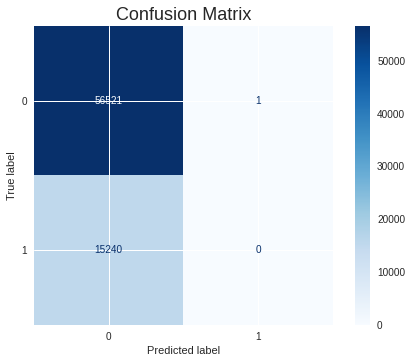

In [115]:
# Confusion Matrix
ConfusionMatrixDisplay.from_estimator(adb_model, x_test, y_test , cmap='Blues')
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [116]:
#  GradientBoosting Classifier Model
from sklearn.ensemble import GradientBoostingClassifier
gb_model = GradientBoostingClassifier()
gb_model.fit(x_train,y_train)
gb_pred = gb_model.predict(x_test)
gb_score= accuracy_score(y_test,gb_pred)
print("GradientBoostingClassifier Model Accuracy: ",gb_score)

GradientBoostingClassifier Model Accuracy:  0.7876313369192609


In [117]:
# Classification Report
print(classification_report(y_test,gb_pred))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88     56522
           1       0.00      0.00      0.00     15240

    accuracy                           0.79     71762
   macro avg       0.39      0.50      0.44     71762
weighted avg       0.62      0.79      0.69     71762



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


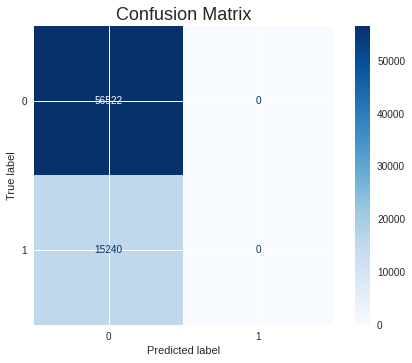

In [118]:
# Confusion Report
ConfusionMatrixDisplay.from_estimator(gb_model, x_test, y_test , cmap='Blues')
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [119]:
# KNeighbors Classifier Model
from sklearn.neighbors import KNeighborsClassifier
kn_model = KNeighborsClassifier()
kn_model.fit(x_train,y_train)
kn_pred = kn_model.predict(x_test)
kn_score= accuracy_score(y_test,kn_pred)
print("KNeighborsClassifier Model Accuracy: ",kn_score)

KNeighborsClassifier Model Accuracy:  0.7567932889272875


In [120]:
# Classification report
print(classification_report(y_test,kn_pred))

              precision    recall  f1-score   support

           0       0.79      0.94      0.86     56522
           1       0.26      0.08      0.12     15240

    accuracy                           0.76     71762
   macro avg       0.53      0.51      0.49     71762
weighted avg       0.68      0.76      0.70     71762



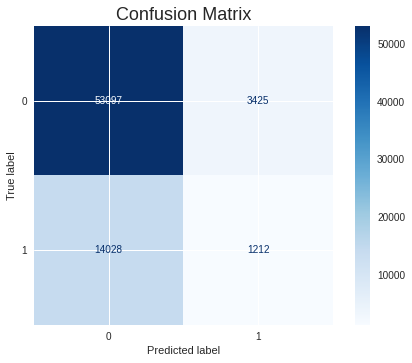

In [121]:
# Confusion Matrix
ConfusionMatrixDisplay.from_estimator(kn_model, x_test, y_test , cmap='Blues')
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [122]:
confusion_matrix(y_test,kn_pred)

array([[53097,  3425],
       [14028,  1212]])

In [123]:
# XGB Classifier Model
from xgboost import XGBClassifier
xg_model = XGBClassifier()
xg_model.fit(x_train,y_train)
xg_pred = xg_model.predict(x_test)
xg_score= accuracy_score(y_test,xg_pred)
print("XGBClassifier Model Accuracy: ",xg_score)

XGBClassifier Model Accuracy:  0.7876313369192609


In [124]:
# Classification report
print(classification_report(y_test,xg_pred))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88     56522
           1       0.00      0.00      0.00     15240

    accuracy                           0.79     71762
   macro avg       0.39      0.50      0.44     71762
weighted avg       0.62      0.79      0.69     71762



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


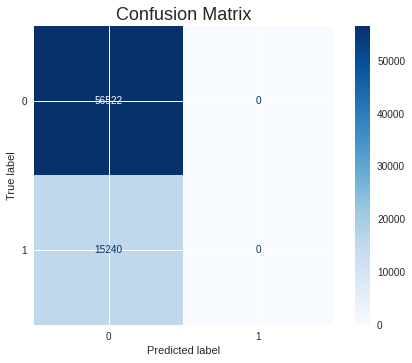

In [125]:
# Confusion Matrix
ConfusionMatrixDisplay.from_estimator(xg_model, x_test, y_test , cmap='Blues')
plt.title('Confusion Matrix', fontsize=18)
plt.show()

We will select the RandomForest model for final prediction

In [132]:
# Final RandomForest model with best parameters and estimators
final_model_rf=RandomForestClassifier(n_estimators=40,
                                  criterion='entropy',
                                  max_features=4)


final_model_rf.fit(x,y)

RandomForestClassifier(criterion='entropy', max_features=4, n_estimators=40)

In [136]:
# feature selection with pcs
from sklearn.decomposition import PCA

# initialize pca model
# We will select the features that are explaining more than 80% of variance 
pca = PCA(n_components=53)

# fit and transform data with pca
pca_data_test = pca.fit_transform(scaled_data_test)

In [137]:
from tables import Column
# create the test dataframe
test_data = pd.DataFrame(pca_data_test)

In [138]:
# Final model prediction on test data 
preds_rft = final_model_rf.predict(test_data)

In [141]:
# final prediction dataset
final_prediction = pd.DataFrame(preds_rft)

In [142]:
# We will save the prediction in the csv file 
final_prediction.to_csv("Dispute_Prediction", index=False)